In [1]:
# import common library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
# import sklearn algorithm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC

In [3]:
# Load the dataset
data = load_iris()

In [4]:
x = data.data
y = data.target

In [5]:
# Split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
# Initialize classifier
svc = SVC(kernel='sigmoid',gamma=1.0)
knn = KNeighborsClassifier()
nb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear',penalty='l1')
rf = RandomForestClassifier(n_estimators=50,random_state=2,max_depth=5)
adaboost = AdaBoostClassifier(n_estimators=50,random_state=2)
bgc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
perceptron = Perceptron()
ridge = RidgeClassifier()
pac = PassiveAggressiveClassifier()
sgd = SGDClassifier()
hgb = HistGradientBoostingClassifier(random_state=2)
gpc = GaussianProcessClassifier(random_state=2)
linearsvc = LinearSVC(random_state=2)

In [7]:
clfs = {
    'SVC' : svc,
    'KNN' : knn,
    'NB' : nb,
    'DT' : dt,
    'LR' : lr,
    'RF' : rf,
    'AdaBoost' : adaboost,
    'BgC' : bgc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb,
    'LDA' : lda,
    'QDA' : qda,
    'Perceptron' : perceptron,
    'Ridge' : ridge,
    'PAC' : pac,
    'SGD' : sgd,
    'HGB' : hgb,
    'GPC' : gpc,
    'LinearSVC' : linearsvc
}

In [8]:
# Initialize results list
results = []

# Evaluate classifiers
for name, clf in clfs.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    results.append({'Classifier': name, 'Accuracy': accuracy, 'Precision': precision})

c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Classifier,Accuracy,Precision
0,SVC,0.300000,0.090000
1,KNN,1.000000,1.000000
2,NB,0.900000,0.925000
3,DT,1.000000,1.000000
4,LR,1.000000,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,0.933333,0.933333
7,BgC,1.000000,1.000000
8,ETC,1.000000,1.000000
9,GBDT,1.000000,1.000000


In [10]:
results_df = results_df.sort_values(by='Accuracy',ascending=False)
results_df

,Classifier,Accuracy,Precision
10,XGB,1.000000,1.000000
8,ETC,1.000000,1.000000
18,GPC,1.000000,1.000000
17,HGB,1.000000,1.000000
11,LDA,1.000000,1.000000
1,KNN,1.000000,1.000000
9,GBDT,1.000000,1.000000
19,LinearSVC,1.000000,1.000000
7,BgC,1.000000,1.000000
5,RF,1.000000,1.000000


<Axes: >

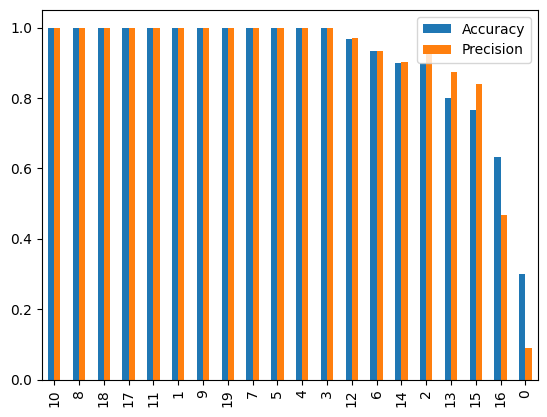

In [11]:
results_df.plot(kind='bar')

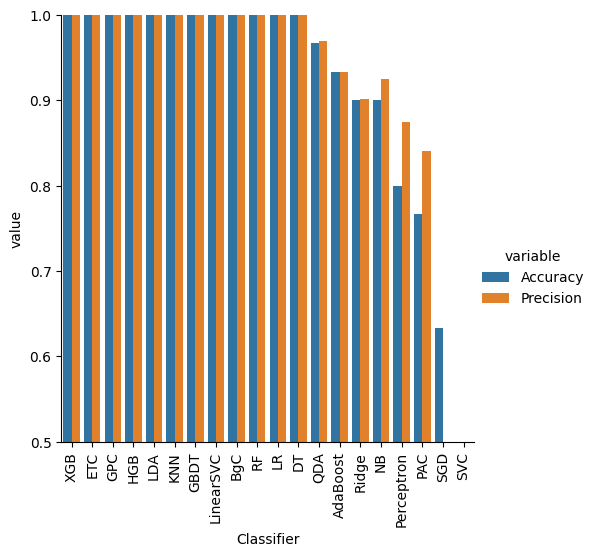

In [12]:
# Reshape the data (if needed)
results_df_long = results_df.melt(id_vars=['Classifier'], var_name='variable', value_name='value')

# Plot the data
sns.catplot(x='Classifier', y='value', hue='variable', data=results_df_long, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

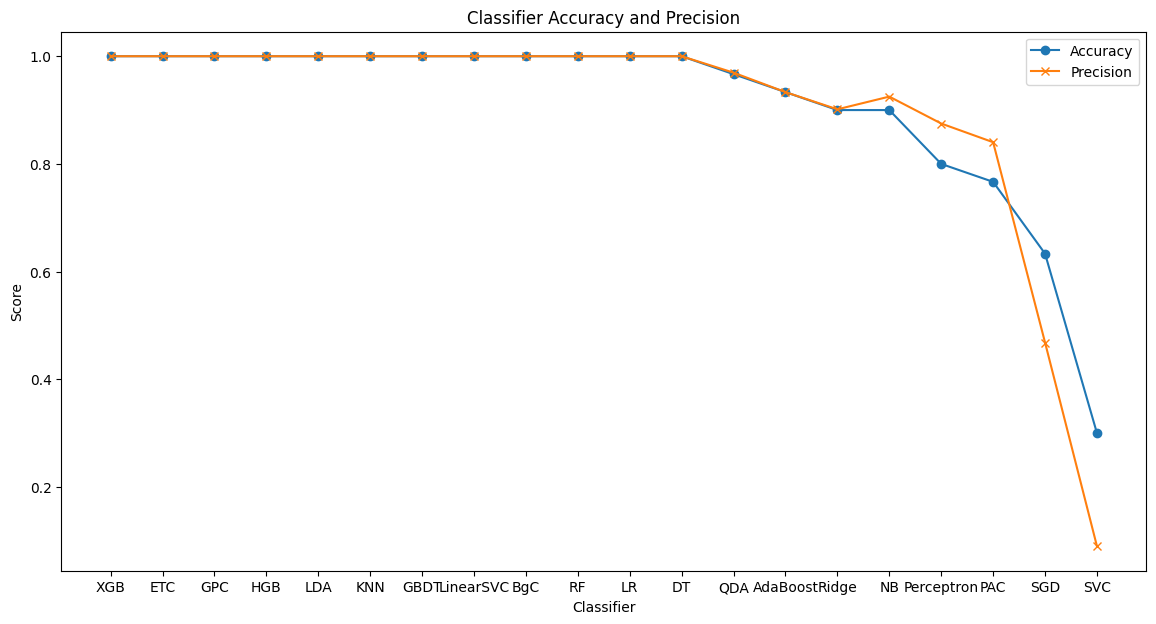

In [13]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(results_df['Classifier'], results_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['Classifier'], results_df['Precision'], label='Precision', marker='x')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Accuracy and Precision')
plt.legend()
plt.show()

# ***Ensemble Learning*** 

## ***1. Stacking (Stacked Generalization)***

In [14]:
# Define base models
base_models = [
    # ('xgb', XGBClassifier(n_estimators=50,random_state=2)),
    ('etc', ExtraTreesClassifier(n_estimators=50,random_state=2)),
    ('gpc', GaussianProcessClassifier(random_state=2)),
    ('hgb', HistGradientBoostingClassifier(random_state=2))
]

In [15]:
# Define the meta-model
meta_model = LinearDiscriminantAnalysis()

In [16]:
from sklearn.ensemble import StackingClassifier

# Creating the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [17]:
# Train the stacking classifier
stacking_clf.fit(x_train, y_train)

StackingClassifier(estimators=[('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('gpc',
                                GaussianProcessClassifier(random_state=2)),
                               ('hgb',
                                HistGradientBoostingClassifier(random_state=2))],
                   final_estimator=LinearDiscriminantAnalysis())

In [18]:
# Evaluate the performance
accuracy = stacking_clf.score(x_test, y_test)
print("Stacking Model Accuracy:", accuracy)

Stacking Model Accuracy: 1.0


## ***2. Voting Classifier***

In [19]:
# Define base models
# xgb = XGBClassifier(n_estimators=50,random_state=2)
etc  = ExtraTreesClassifier(n_estimators=50,random_state=2)
gpc = GaussianProcessClassifier(random_state=2)
hgb = HistGradientBoostingClassifier(random_state=2)
lda = LinearDiscriminantAnalysis()

In [20]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    # ('xgb', xgb),
    ('etc', etc),
    ('gpc', gpc),
    ('hgb',hgb),
    ('lda',lda)
], voting='soft')  # Use 'hard' for hard voting

In [21]:
# Train the model
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('gpc', GaussianProcessClassifier(random_state=2)),
                             ('hgb',
                              HistGradientBoostingClassifier(random_state=2)),
                             ('lda', LinearDiscriminantAnalysis())],
                 voting='soft')

In [22]:
# Evaluate the performance
accuracy = voting_clf.score(x_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 1.0


## ***3. Bagging Ensemble***

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pickle

In [24]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [25]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Define individual classifiers for bagging
classifiers = [
    ("DecisionTree", DecisionTreeClassifier(max_depth=5)),
    ("KNeighbors", KNeighborsClassifier(n_neighbors=3)),
    ("SVM", SVC(probability=True, kernel='linear')),
    ("LogisticRegression", LogisticRegression(max_iter=200)),
    ("NaiveBayes", GaussianNB())
]

In [27]:
# Iterate through each classifier and apply BaggingClassifier
for clf_name, clf in classifiers:
    print(f"Training Bagging with {clf_name}...")
    
    # BaggingClassifier with the current classifier as base
    bagging_ensemble = BaggingClassifier(
        estimator=clf,  # Using current classifier as base estimator
        n_estimators=10,     # Number of base estimators (models in the ensemble)
        random_state=42,     # Ensures reproducibility
        bootstrap=True       # Sampling with replacement for bagging
    )
    
    # Fit the ensemble to training data
    bagging_ensemble.fit(X_train, y_train)
    
    # Evaluate the model
    predictions = bagging_ensemble.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{clf_name} Bagging Ensemble Accuracy: {accuracy:.2f}")
    
    # Save the model
    model_path = f'baggio_{clf_name.lower()}_ensemble_model.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(bagging_ensemble, f)
    print(f"{clf_name} model saved!\n")

Training Bagging with DecisionTree...
DecisionTree Bagging Ensemble Accuracy: 1.00
DecisionTree model saved!

Training Bagging with KNeighbors...
KNeighbors Bagging Ensemble Accuracy: 1.00
KNeighbors model saved!

Training Bagging with SVM...
SVM Bagging Ensemble Accuracy: 1.00
SVM model saved!

Training Bagging with LogisticRegression...
LogisticRegression Bagging Ensemble Accuracy: 1.00
LogisticRegression model saved!

Training Bagging with NaiveBayes...
NaiveBayes Bagging Ensemble Accuracy: 1.00
NaiveBayes model saved!



## ***4. Boosting Ensemble***

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pickle

In [29]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Define individual classifiers for boosting
classifiers = [
    ("DecisionTree", DecisionTreeClassifier(max_depth=5)),
    # ("KNeighbors", KNeighborsClassifier(n_neighbors=3)),
    ("SVM", SVC(probability=True, kernel='linear')),
    ("LogisticRegression", LogisticRegression(max_iter=200)),
    ("NaiveBayes", GaussianNB())
]

In [32]:
# Iterate through each classifier and apply AdaBoostClassifier
for clf_name, clf in classifiers:
    print(f"Training AdaBoost with {clf_name}...")
    
    # AdaBoost with the current classifier as base estimator
    boosting_ensemble = AdaBoostClassifier(
        estimator=clf,  # Using current classifier as base estimator
        n_estimators=50,     # Number of base estimators (models in the ensemble)
        random_state=42      # Ensures reproducibility
    )
    
    # Fit the ensemble to training data
    boosting_ensemble.fit(X_train, y_train)
    
    # Evaluate the model
    predictions = boosting_ensemble.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{clf_name} AdaBoost Ensemble Accuracy: {accuracy:.2f}")
    
    # Save the model
    model_path = f'boosting_{clf_name.lower()}_ensemble_model.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(boosting_ensemble, f)
    print(f"{clf_name} AdaBoost model saved!\n")

Training AdaBoost with DecisionTree...
DecisionTree AdaBoost Ensemble Accuracy: 1.00
DecisionTree AdaBoost model saved!

Training AdaBoost with SVM...
SVM AdaBoost Ensemble Accuracy: 0.97
SVM AdaBoost model saved!

Training AdaBoost with LogisticRegression...
LogisticRegression AdaBoost Ensemble Accuracy: 0.93
LogisticRegression AdaBoost model saved!

Training AdaBoost with NaiveBayes...
NaiveBayes AdaBoost Ensemble Accuracy: 1.00
NaiveBayes AdaBoost model saved!

